In [1]:
# Iris Flower Detection Project
# Complete implementation for Jupyter Notebook

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("=== IRIS FLOWER DETECTION PROJECT ===\n")

=== IRIS FLOWER DETECTION PROJECT ===



In [2]:


# 1. Load the Dataset
print("1. Loading the Iris Dataset...")
iris = load_iris()
X = iris.data
y = iris.target

# Create DataFrame for easier manipulation
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = iris.target
df['species_name'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print(f"Dataset shape: {df.shape}")
print(f"Features: {iris.feature_names}")
print(f"Target classes: {iris.target_names}")

1. Loading the Iris Dataset...
Dataset shape: (150, 6)
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target classes: ['setosa' 'versicolor' 'virginica']


In [3]:
# 2. Data Exploration
print("\n2. Data Exploration...")
print("\nFirst 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nStatistical Summary:")
print(df.describe())

print("\nClass Distribution:")
print(df['species_name'].value_counts())

print("\nChecking for missing values:")
print(df.isnull().sum())


2. Data Exploration...

First 5 rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species species_name  
0        0       setosa  
1        0       setosa  
2        0       setosa  
3        0       setosa  
4        0       setosa  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (


3. Creating Visualizations...


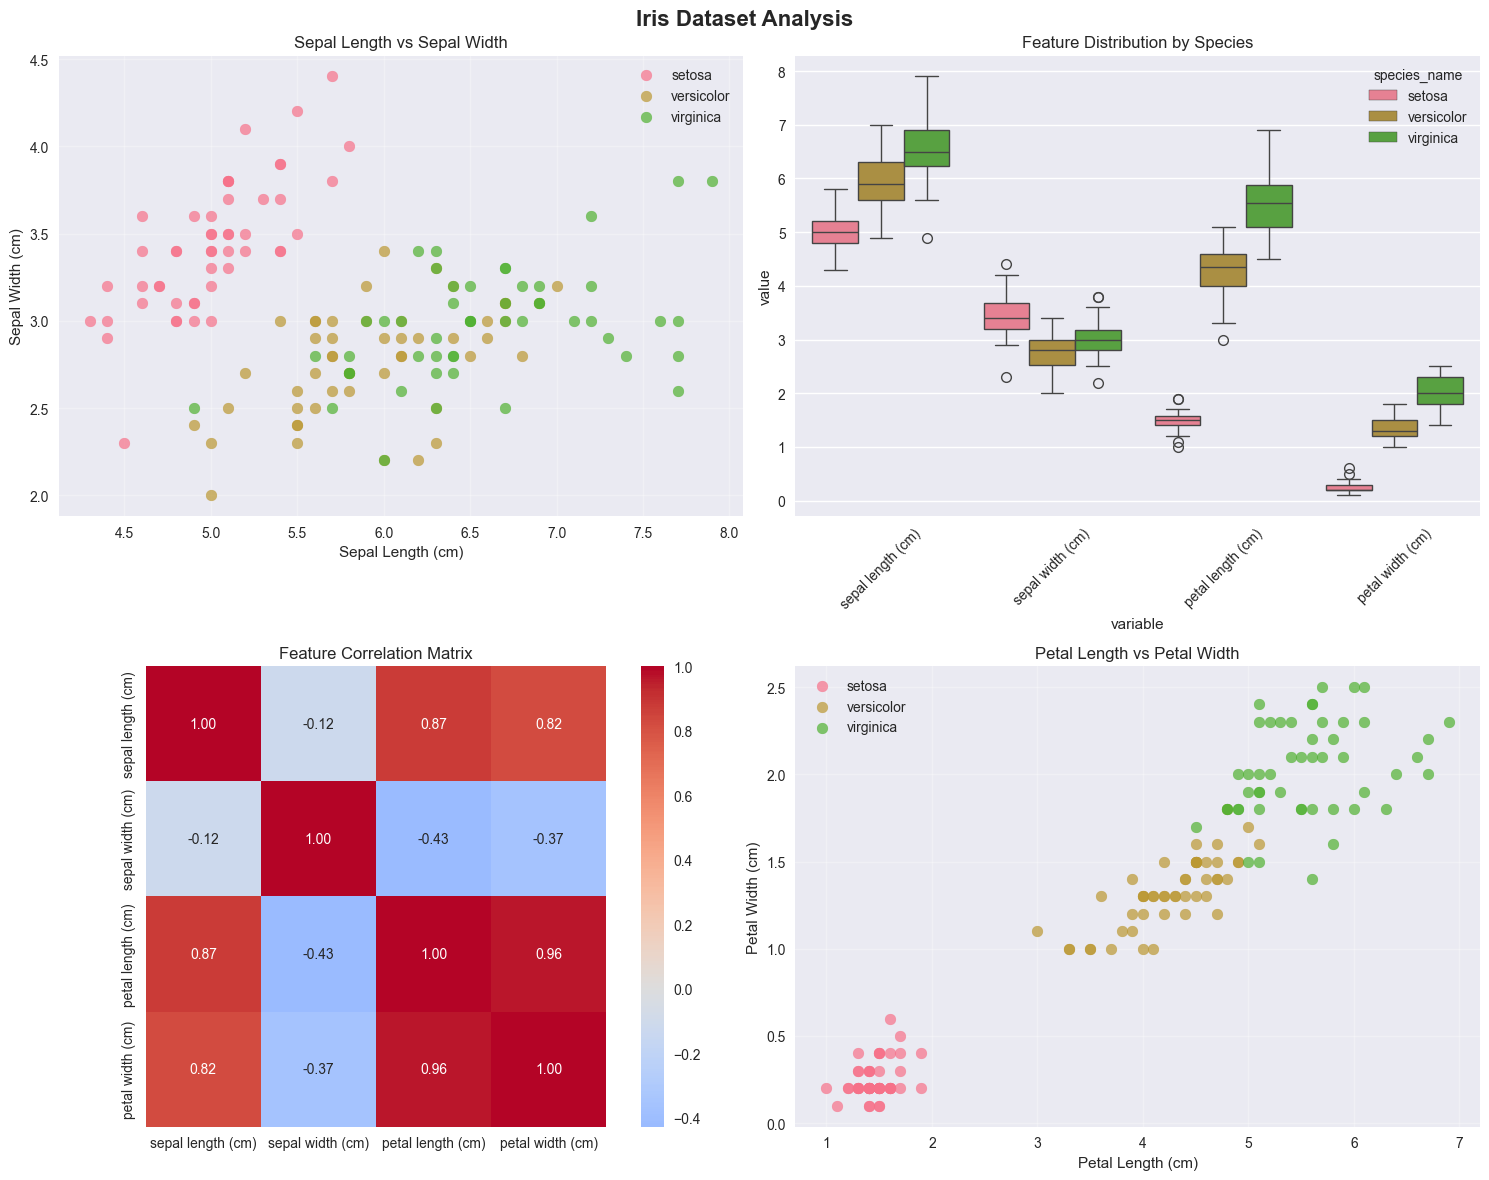


Creating detailed pairplot...


<Figure size 1200x1000 with 0 Axes>

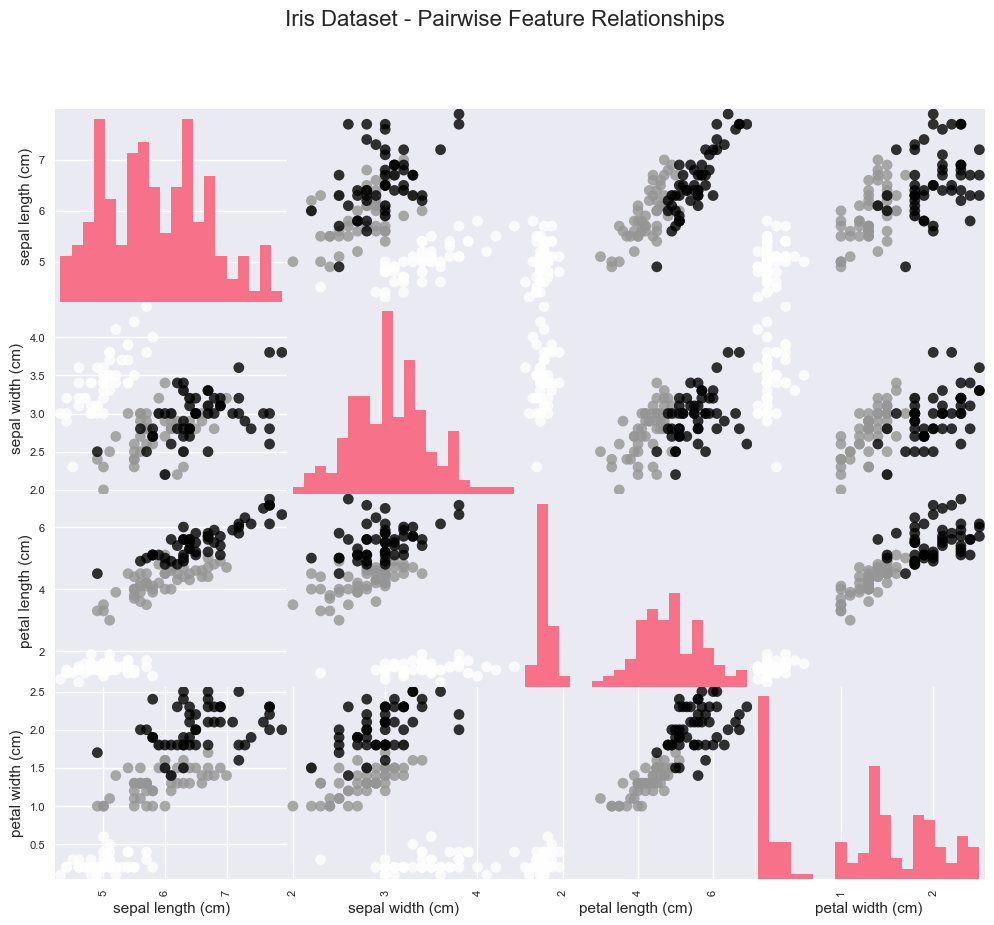

In [4]:
# 3. Data Visualization
print("\n3. Creating Visualizations...")

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Iris Dataset Analysis', fontsize=16, fontweight='bold')

# Pairplot of features
plt.subplot(2, 2, 1)
for species in df['species_name'].unique():
    species_data = df[df['species_name'] == species]
    plt.scatter(species_data['sepal length (cm)'], species_data['sepal width (cm)'], 
               label=species, alpha=0.7, s=60)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Sepal Width')
plt.legend()
plt.grid(True, alpha=0.3)

# Box plot
plt.subplot(2, 2, 2)
df_melted = df.melt(id_vars=['species_name'], 
                    value_vars=['sepal length (cm)', 'sepal width (cm)', 
                               'petal length (cm)', 'petal width (cm)'])
sns.boxplot(data=df_melted, x='variable', y='value', hue='species_name')
plt.title('Feature Distribution by Species')
plt.xticks(rotation=45)

# Correlation heatmap
plt.subplot(2, 2, 3)
correlation_matrix = df[iris.feature_names].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f')
plt.title('Feature Correlation Matrix')

# Petal features scatter
plt.subplot(2, 2, 4)
for species in df['species_name'].unique():
    species_data = df[df['species_name'] == species]
    plt.scatter(species_data['petal length (cm)'], species_data['petal width (cm)'], 
               label=species, alpha=0.7, s=60)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal Length vs Petal Width')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Additional detailed pairplot
print("\nCreating detailed pairplot...")
plt.figure(figsize=(12, 10))
pd.plotting.scatter_matrix(df[iris.feature_names], 
                          c=df['species'], 
                          figsize=(12, 10), 
                          marker='o', 
                          hist_kwds={'bins': 20}, 
                          s=60, 
                          alpha=0.8)
plt.suptitle('Iris Dataset - Pairwise Feature Relationships', fontsize=16)
plt.show()

In [5]:
# 4. Data Preprocessing
print("\n4. Data Preprocessing...")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")


4. Data Preprocessing...
Training set size: (120, 4)
Test set size: (30, 4)


In [6]:
# 5. Model Training and Evaluation
print("\n5. Training Multiple Models...")

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=3),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Train and evaluate models
results = {}
predictions = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Train the model
    if name in ['Logistic Regression', 'SVM', 'K-Nearest Neighbors']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        # Cross-validation with scaled data
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        # Cross-validation with original data
        cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()
    
    results[name] = {
        'Accuracy': accuracy,
        'CV Mean': cv_mean,
        'CV Std': cv_std
    }
    predictions[name] = y_pred
    
    print(f"Test Accuracy: {accuracy:.4f}")
    print(f"CV Accuracy: {cv_mean:.4f} (+/- {cv_std * 2:.4f})")



5. Training Multiple Models...

Training Logistic Regression...
Test Accuracy: 0.9333
CV Accuracy: 0.9583 (+/- 0.0527)

Training SVM...
Test Accuracy: 0.9667
CV Accuracy: 0.9667 (+/- 0.0624)

Training Random Forest...
Test Accuracy: 0.9000
CV Accuracy: 0.9500 (+/- 0.0333)

Training K-Nearest Neighbors...
Test Accuracy: 0.9333
CV Accuracy: 0.9583 (+/- 0.0745)

Training Decision Tree...
Test Accuracy: 0.9333
CV Accuracy: 0.9417 (+/- 0.0408)


In [7]:
# 6. Results Comparison
print("\n6. Model Comparison Results:")
print("-" * 60)
results_df = pd.DataFrame(results).T
print(results_df.round(4))

# Find best model
best_model = results_df['Accuracy'].idxmax()
best_accuracy = results_df.loc[best_model, 'Accuracy']
print(f"\nBest Model: {best_model} with accuracy: {best_accuracy:.4f}")



6. Model Comparison Results:
------------------------------------------------------------
                     Accuracy  CV Mean  CV Std
Logistic Regression    0.9333   0.9583  0.0264
SVM                    0.9667   0.9667  0.0312
Random Forest          0.9000   0.9500  0.0167
K-Nearest Neighbors    0.9333   0.9583  0.0373
Decision Tree          0.9333   0.9417  0.0204

Best Model: SVM with accuracy: 0.9667



7. Detailed Analysis of SVM:

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



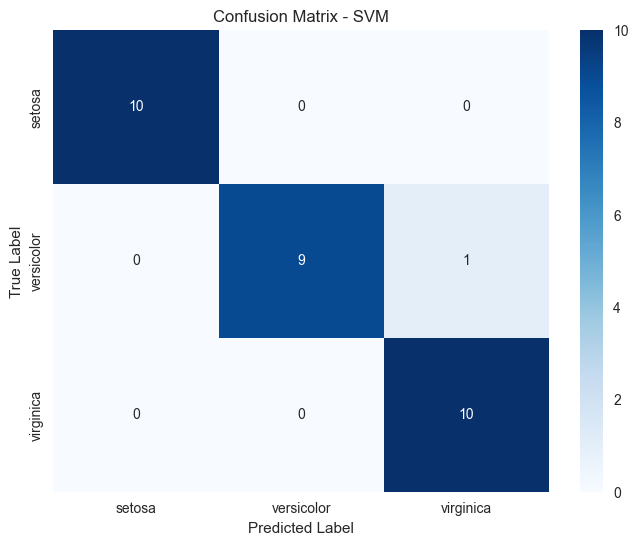

In [8]:

# 7. Detailed Analysis of Best Model
print(f"\n7. Detailed Analysis of {best_model}:")
best_predictions = predictions[best_model]

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, best_predictions, target_names=iris.target_names))

# Confusion matrix
cm = confusion_matrix(y_test, best_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=iris.target_names, 
            yticklabels=iris.target_names)
plt.title(f'Confusion Matrix - {best_model}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


In [9]:

# 8. Feature Importance (for tree-based models)
if best_model in ['Random Forest', 'Decision Tree']:
    print(f"\n8. Feature Importance for {best_model}:")
    best_model_obj = models[best_model]
    feature_importance = pd.DataFrame({
        'feature': iris.feature_names,
        'importance': best_model_obj.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print(feature_importance)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_importance, x='importance', y='feature')
    plt.title(f'Feature Importance - {best_model}')
    plt.xlabel('Importance')
    plt.show()



9. Creating Model Comparison Visualization...


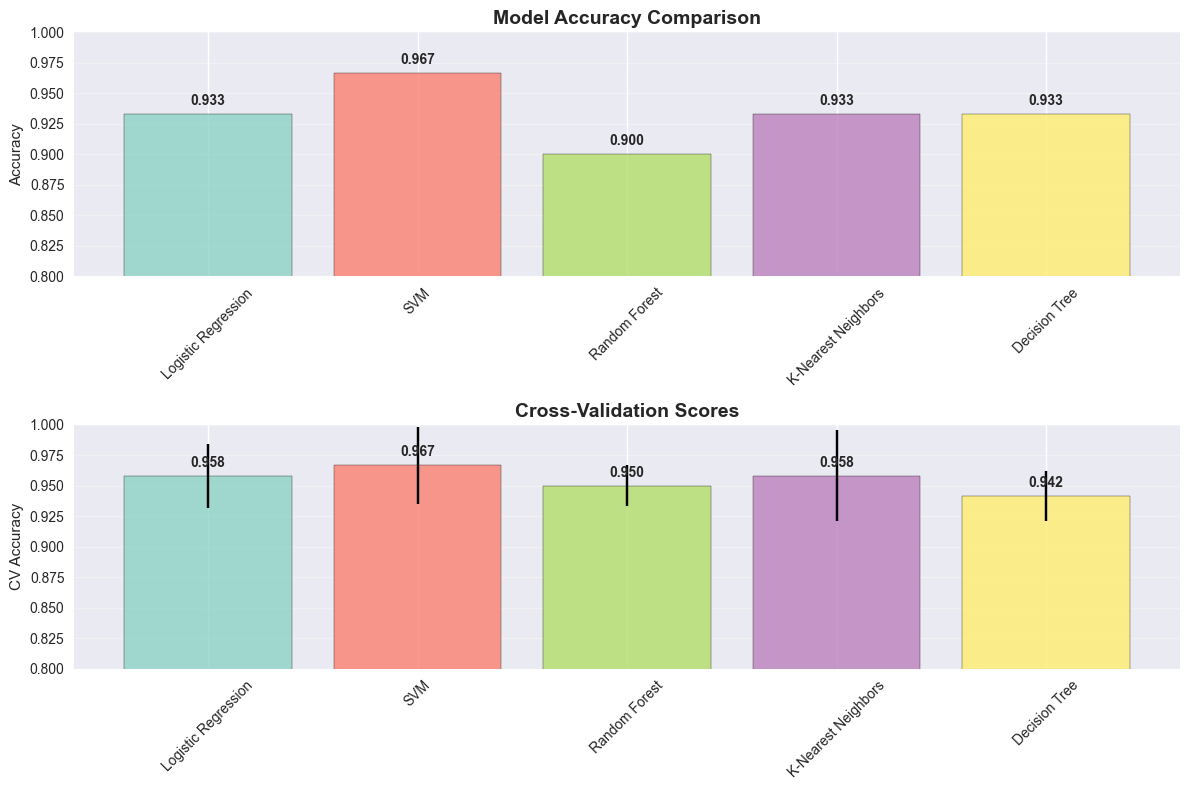

In [10]:

# 9. Model Comparison Visualization
print("\n9. Creating Model Comparison Visualization...")
plt.figure(figsize=(12, 8))

# Accuracy comparison
plt.subplot(2, 1, 1)
models_names = list(results.keys())
accuracies = [results[model]['Accuracy'] for model in models_names]
colors = plt.cm.Set3(np.linspace(0, 1, len(models_names)))

bars = plt.bar(models_names, accuracies, color=colors, alpha=0.8, edgecolor='black')
plt.title('Model Accuracy Comparison', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0)

# Add value labels on bars
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, 
             f'{acc:.3f}', ha='center', va='bottom', fontweight='bold')

plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Cross-validation scores
plt.subplot(2, 1, 2)
cv_means = [results[model]['CV Mean'] for model in models_names]
cv_stds = [results[model]['CV Std'] for model in models_names]

bars = plt.bar(models_names, cv_means, yerr=cv_stds, capsize=5, 
               color=colors, alpha=0.8, edgecolor='black')
plt.title('Cross-Validation Scores', fontsize=14, fontweight='bold')
plt.ylabel('CV Accuracy')
plt.ylim(0.8, 1.0)

# Add value labels
for bar, mean_acc in zip(bars, cv_means):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, 
             f'{mean_acc:.3f}', ha='center', va='bottom', fontweight='bold')

plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


In [11]:

# 10. Prediction Function
def predict_iris_species(sepal_length, sepal_width, petal_length, petal_width):
    """
    Predict iris species based on flower measurements
    """
    # Use the best performing model
    best_model_obj = models[best_model]
    
    # Create input array
    input_data = np.array([[sepal_length, sepal_width, petal_length, petal_width]])
    
    # Scale if necessary
    if best_model in ['Logistic Regression', 'SVM', 'K-Nearest Neighbors']:
        input_data = scaler.transform(input_data)
    
    # Make prediction
    prediction = best_model_obj.predict(input_data)[0]
    probability = None
    
    # Get probability if available
    if hasattr(best_model_obj, 'predict_proba'):
        if best_model in ['Logistic Regression', 'SVM', 'K-Nearest Neighbors']:
            proba = best_model_obj.predict_proba(input_data)[0]
        else:
            proba = best_model_obj.predict_proba(np.array([[sepal_length, sepal_width, petal_length, petal_width]]))[0]
        probability = dict(zip(iris.target_names, proba))
    
    return iris.target_names[prediction], probability


In [12]:

# Example predictions
print("\n10. Example Predictions:")
examples = [
    (5.1, 3.5, 1.4, 0.2),  # Typical setosa
    (6.2, 2.8, 4.8, 1.8),  # Typical versicolor  
    (7.2, 3.0, 5.8, 2.2)   # Typical virginica
]

for i, (sl, sw, pl, pw) in enumerate(examples, 1):
    species, proba = predict_iris_species(sl, sw, pl, pw)
    print(f"\nExample {i}: Sepal Length={sl}, Sepal Width={sw}, Petal Length={pl}, Petal Width={pw}")
    print(f"Predicted Species: {species}")
    if proba:
        print("Probabilities:")
        for spec, prob in proba.items():
            print(f"  {spec}: {prob:.3f}")

print(f"\n=== PROJECT COMPLETED ===")
print(f"Best performing model: {best_model}")
print(f"Final accuracy: {best_accuracy:.4f}")
print("You can use the predict_iris_species() function to make new predictions!")


10. Example Predictions:

Example 1: Sepal Length=5.1, Sepal Width=3.5, Petal Length=1.4, Petal Width=0.2
Predicted Species: setosa

Example 2: Sepal Length=6.2, Sepal Width=2.8, Petal Length=4.8, Petal Width=1.8
Predicted Species: virginica

Example 3: Sepal Length=7.2, Sepal Width=3.0, Petal Length=5.8, Petal Width=2.2
Predicted Species: virginica

=== PROJECT COMPLETED ===
Best performing model: SVM
Final accuracy: 0.9667
You can use the predict_iris_species() function to make new predictions!
